# Tarea 2

- Cargue los datos de meteorite_landins.csv de la sesión 3
- Cree un nuevo dataframe llamado meteoritos_h4. En este dataframe, utilizando la función str. seleccione todos los meteoritos solamente de categoría H4
- Cree otro dataframe llamado meteoritos_h5. En este dataframe, utilizando la función str. seleccione todos los meteoritos de solamente categoría H5
- Limpie los datos de ambos dataframes, eliminando las entradas donde las masas sean cero, null, NaN, etc.
- Utilizando masks y selecciones, cuente cuántos meteoritos H4 cayeron entre 1960 y 1990.
- Utilizando masks y selecciones, cuente cuántos meteoritos H5 cayeron entre 1960 y 1990.
- Concatene ambos dataframes y grafique la cantidad de meteoritos por clase y por año

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('meteorite-landings.csv')

In [329]:
meteoritos_h4 = data[data.recclass.str.fullmatch('H4')]

In [330]:
meteoritos_h5 = data[data.recclass.str.fullmatch('H5')]

In [331]:
meteoritos_h4 = meteoritos_h4.drop(meteoritos_h4[meteoritos_h4['mass']==0.0].index).dropna()
meteoritos_h5 = meteoritos_h5.drop(meteoritos_h5[meteoritos_h5['mass']==0.0].index).dropna()

In [332]:
h4years = meteoritos_h4[(meteoritos_h4.year > 1960) & (meteoritos_h4.year < 1990)]
maskh4 = h4years['recclass'].str.contains('H4')
print('Entre 1960 y 1960 cayeron', len(maskh4), 'meteoritos clase H4')

Entre 1960 y 1960 cayeron 2192 meteoritos clase H4


In [333]:
h5years = meteoritos_h5[(meteoritos_h5.year > 1960) & (meteoritos_h5.year < 1990)]
maskh5 = h5years['recclass'].str.contains('H5')
print('Entre 1960 y 1960 cayeron', len(maskh5), 'meteoritos clase H5')

Entre 1960 y 1960 cayeron 2633 meteoritos clase H5


In [334]:
concat_h4_h5 = pd.concat([h4years, h5years], axis=0)

Text(0.5, 1.0, '% Meteoritos por clase')

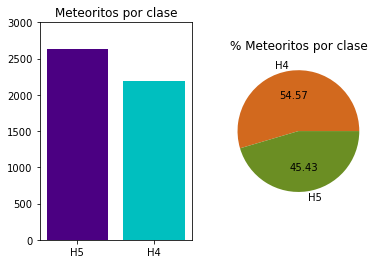

In [335]:
pltclass = concat_h4_h5.recclass.value_counts().reset_index() 
plt.subplot(1, 2, 1)
plt.bar(x = pltclass['index'], height = pltclass['recclass'], color= ['indigo', 'c'])
plt.ylim(0, 3000)
plt.title('Meteoritos por clase')
plt.subplot(1, 2, 2)
plt.pie(concat_h4_h5.recclass.value_counts(), labels = ['H4', 'H5'], autopct='%.2f', colors= ['chocolate', 'olivedrab'])
plt.title('% Meteoritos por clase')

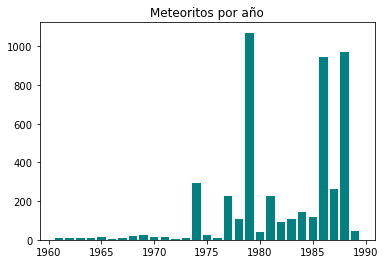

In [356]:
pltyear = concat_h4_h5.year.value_counts().reset_index()
pltyear

plt.bar(x = pltyear['index'], height = pltyear['year'], color='teal')
plt.title('Meteoritos por año');

Text(0.5, 1.0, 'Meteoritos por año')

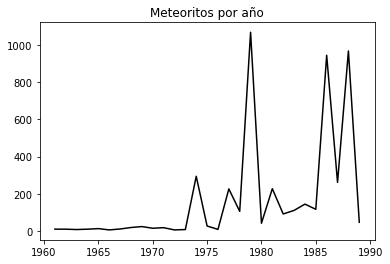

In [355]:
plt.plot(pltyear.sort_values('index')['index'], pltyear.sort_values('index')['year'], '-', color='black')
plt.title('Meteoritos por año')